In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder



In [5]:
Archivo = pd.read_csv('C:\\Users\\hecto\\OneDrive - Universidad Nacional Abierta y a Distancia\\2024-1\\ANÁLISIS DE DATOS\\TAREA 3\\Anexo 2 - Dataset Vehicle\\Car details v3.csv', encoding='latin1')


In [6]:
#  1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
# Inspeccion de datos

print(Archivo.columns)

Index(['Nombre', 'Año', 'Precio', 'km_conducido', 'Combustible', 'seller_type',
       'transmission', 'Dueño', 'Kilometraje', 'Motor', 'max_power', 'torque',
       'Asientos'],
      dtype='object')


In [91]:
Archivo.head(20)

,Nombre,Año,Precio,km_conducido,Combustible,seller_type,transmission,Dueño,Kilometraje,Motor,max_power,torque,Asientos
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [80]:

Archivo.describe()

,Año,Precio,km_conducido,Asientos
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [81]:
Archivo.shape

(8128, 13)

In [11]:
Archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nombre        8128 non-null   object 
 1   Año           8128 non-null   int64  
 2   Precio        8128 non-null   int64  
 3   km_conducido  8128 non-null   int64  
 4   Combustible   8128 non-null   object 
 5   seller_type   8128 non-null   object 
 6   transmission  8128 non-null   object 
 7   Dueño         8128 non-null   object 
 8   Kilometraje   7907 non-null   object 
 9   Motor         7907 non-null   object 
 10  max_power     7913 non-null   object 
 11  torque        7906 non-null   object 
 12  Asientos      7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
# 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
# Limpieza de datos
Archivo.isnull().sum()*100/Archivo.shape[0]

Nombre          0.000000
Año             0.000000
Precio          0.000000
km_conducido    0.000000
Combustible     0.000000
seller_type     0.000000
transmission    0.000000
Dueño           0.000000
Kilometraje     2.718996
Motor           2.718996
max_power       2.645177
torque          2.731299
Asientos        2.718996
dtype: float64

In [7]:
nuevo_archivo = Archivo[[ 'Año', 'Precio','km_conducido','transmission']]

In [8]:
import pandas as pd
# convertir un ojeto a una variable boleana
dummies = pd.get_dummies(nuevo_archivo['transmission'], prefix='transmission')
nuevo_archivo = pd.concat([nuevo_archivo, dummies], axis=1)
nuevo_archivo.drop('transmission', axis=1, inplace=True)
# Ahora 'transmission' contiene dos nuevas columnas numéricas ('transmission_Automatic' y 'transmission_Manual')

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

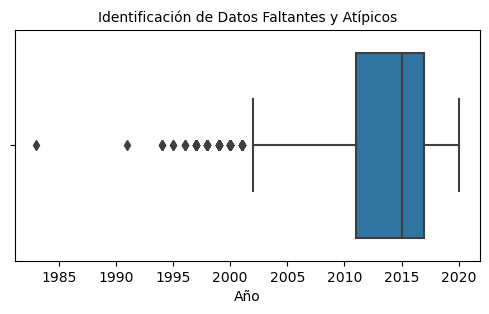

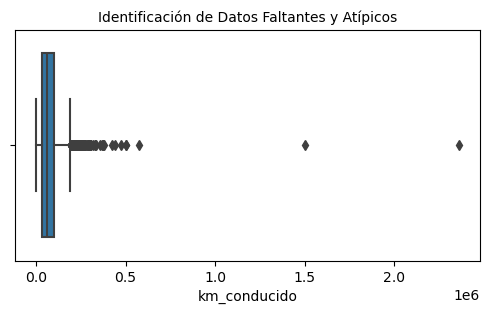

In [19]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo['Año'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo['km_conducido'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )


In [20]:
#   2. Preprocesar los datos limpiándolos, tratando valores faltantes ytransformándolos según sea necesario.
print("Registros faltantes de kilometraje: ",Archivo['Kilometraje'].isin([0]).sum())
print("Registros faltantes de motors: ",Archivo['Motor'].isin([0]).sum())
print("Registros faltantes de kilometros conducidos: ",Archivo['max_power'].isin([0]).sum())



Registros faltantes de kilometraje:  0
Registros faltantes de motors:  0
Registros faltantes de kilometros conducidos:  0


In [112]:
nivel_minimo=1983
nivel_maximo=2020
Total_Atipicos=((Archivo['Año']<nivel_minimo)|(Archivo['Año']>nivel_maximo)).sum()
print("El total de datos atípicos es: {}".format(Total_Atipicos))

El total de datos atípicos es: 0


In [27]:
# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

# Total de transmission

nuevo_archivo['transmission'].value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [24]:
Archivo['Combustible'].value_counts()

Combustible
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [32]:
# Ignorar la advertencia específica
import warnings
# Ignorar la advertencia específica
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)


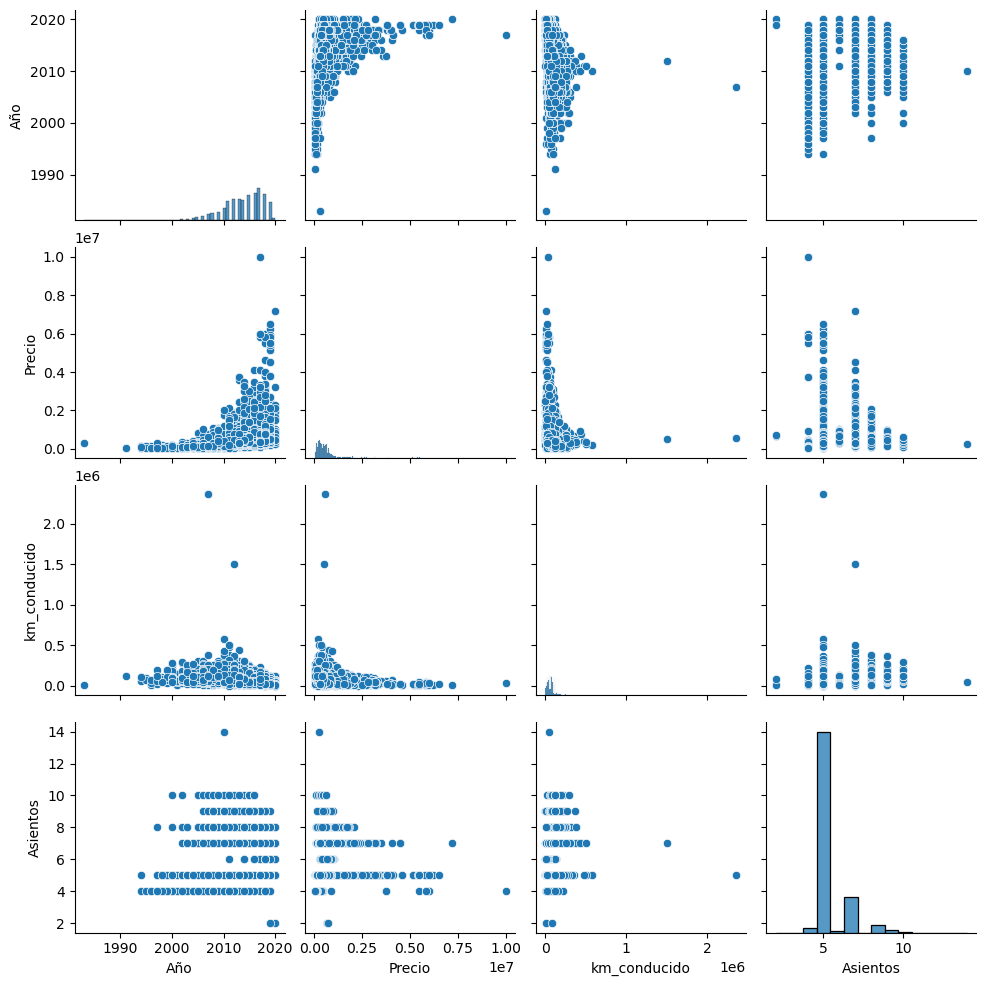

In [33]:
# explorar la relación entre todas las variables numéricas en tu conjunto de datos de una sola vez.
sns.pairplot(Archivo)
plt.show()

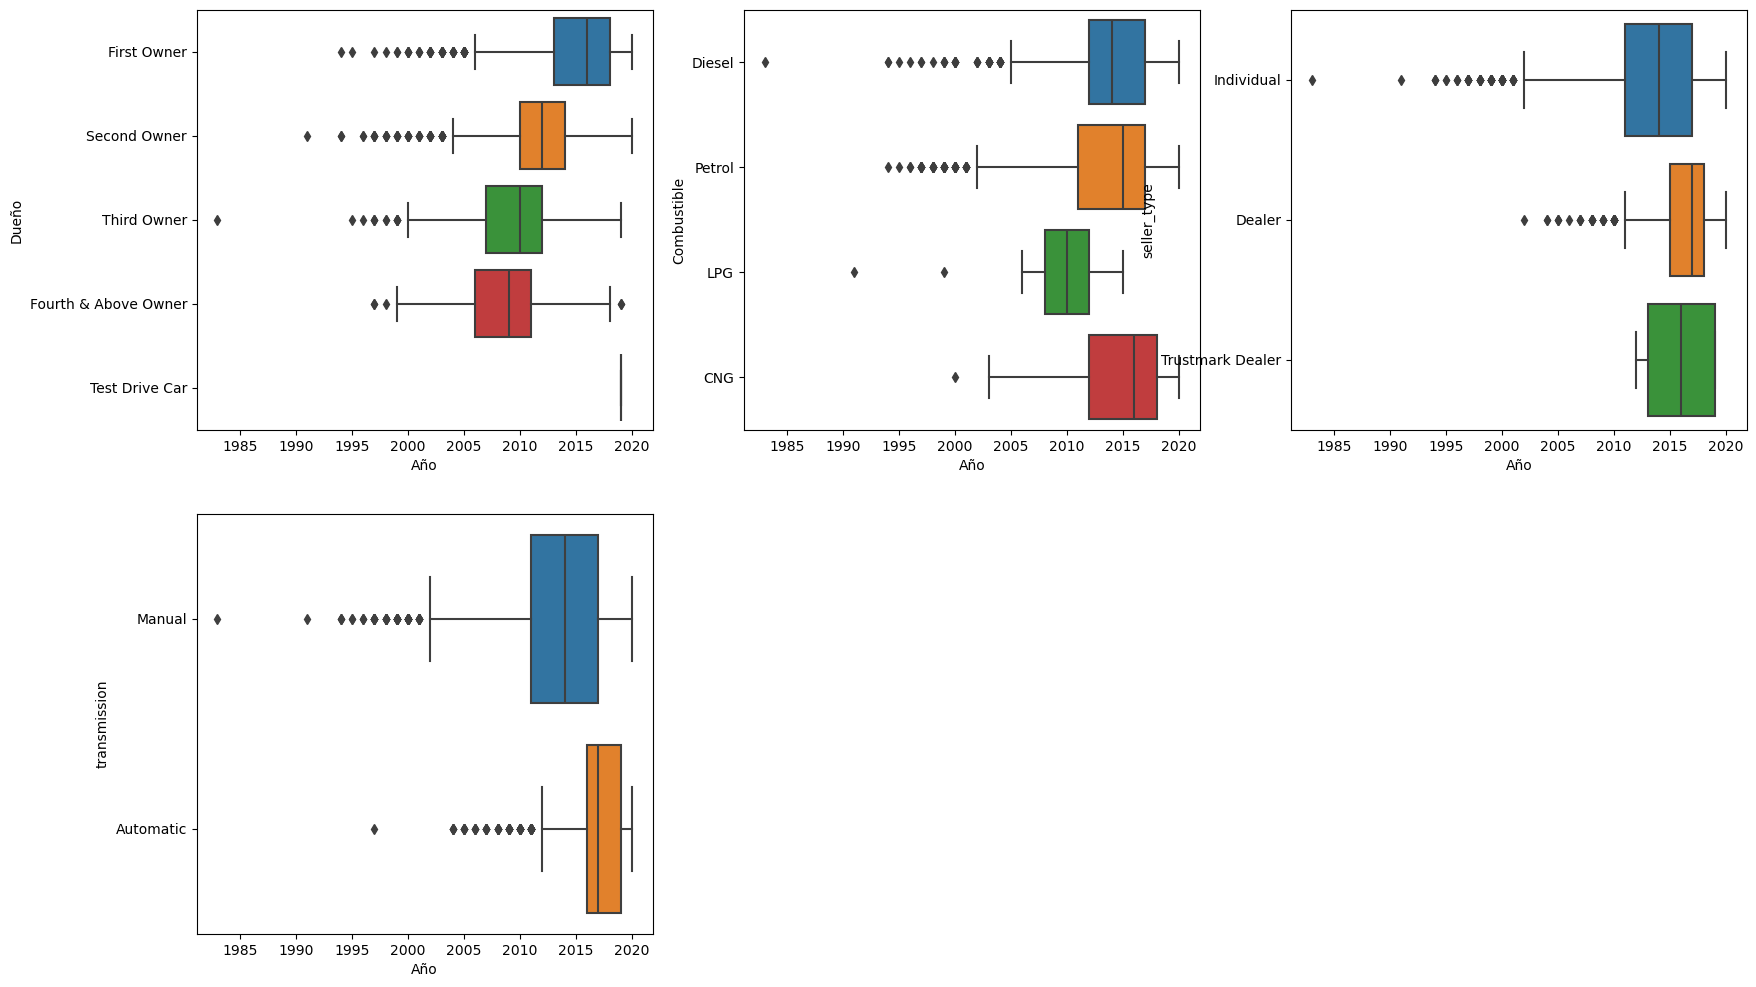

In [39]:
# visualizacion de variables categoricas
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Año', y = 'Dueño', data = Archivo)
plt.subplot(2,3,2)
sns.boxplot(x = 'Año', y = 'Combustible', data = Archivo)
plt.subplot(2,3,3)
sns.boxplot(x = 'Año', y = 'seller_type', data = Archivo)
plt.subplot(2,3,4)
sns.boxplot(x = 'Año', y = 'transmission', data = Archivo)


plt.show()


In [9]:
#  4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = nuevo_archivo.drop('Año',axis=1) # Se cargan los datos de train sin los datos de la columna Año
Y = nuevo_archivo['Año'] # Se cargan los datos de train con los datos de la la columna Año

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state= 0)

In [10]:
print (X_train)

      Precio  km_conducido  transmission_Automatic  transmission_Manual
4313  267000         40000                   False                 True
5178  500000        120000                    True                False
758   200000         80000                   False                 True
7117  900000        100000                   False                 True
2606  375000         77000                   False                 True
...      ...           ...                     ...                  ...
4931  300000         70000                   False                 True
3264  220000        100000                   False                 True
1653  170000         90000                   False                 True
2607  375000         90000                   False                 True
2732  225000        110000                   False                 True

[6096 rows x 4 columns]


In [11]:
print (Y_train)

4313    2012
5178    2007
758     2013
7117    2016
2606    2013
        ... 
4931    2012
3264    2012
1653    2009
2607    2012
2732    2012
Name: Año, Length: 6096, dtype: int64


In [12]:

from sklearn.linear_model import LinearRegression
#  5. Entrenar el modelo configurando los diferentes hiperparámetros
# Construir el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación




In [106]:
print (Y_test)

3558    2013
233     2013
7952    2019
572     2004
6960    2019
        ... 
2761    2004
1487    2006
4284    2012
5698    2012
4643    2014
Name: Año, Length: 2032, dtype: int64


In [107]:
print (Prediccion)

[2014.00575497 2014.3368522  2014.62048416 ... 2013.09631213 2013.15145114
 2013.84952777]


In [108]:
#   6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
# Desempeño del modelo de regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, Prediccion)
print("Error cuadrático medio:", mse)

# Calcula la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(Y_test, Prediccion, squared=False)
print("Raíz del error cuadrático medio:", rmse)

# Calcula el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, Prediccion)
print("Error absoluto medio:", mae)

# Calcula el coeficiente de determinación (R-cuadrado)
r2 = r2_score(Y_test, Prediccion)
print("Coeficiente de determinación (R-cuadrado):", r2)



Error cuadrático medio: 11.322244124914215
Raíz del error cuadrático medio: 3.3648542501740275
Error absoluto medio: 2.5971443965555734
Coeficiente de determinación (R-cuadrado): 0.3009456571034046


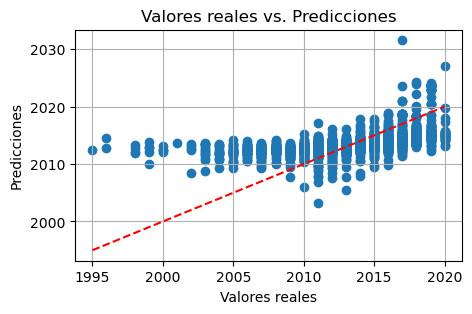

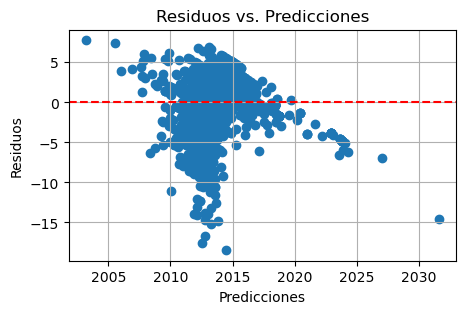

C:\Users\hecto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


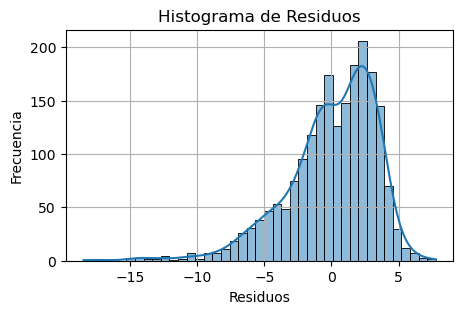

In [13]:
#   7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión de los valores reales vs. las predicciones
plt.figure(figsize=(5, 3))
plt.scatter(Y_test, Prediccion)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red')  # Línea diagonal
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.grid(True)
plt.show()

# Gráfico de residuos vs. predicciones
residuos = Y_test - Prediccion
plt.figure(figsize=(5, 3))
plt.scatter(Prediccion, residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Predicciones')
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0
plt.grid(True)
plt.show()

# Histograma de residuos
plt.figure(figsize=(5, 3))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.grid(True)
plt.show()


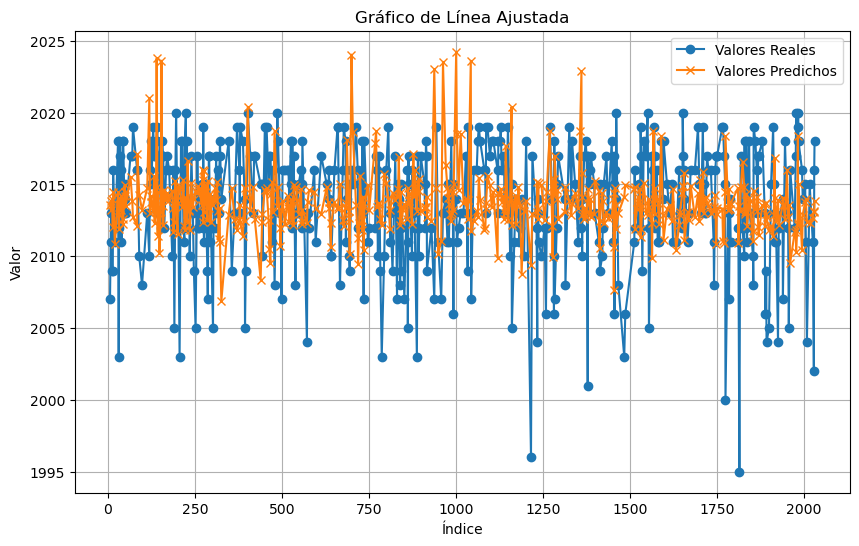

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Encontrar la intersección de los índices en sorted_indices y el índice de Y_test
valid_indices = np.intersect1d(sorted_indices, Y_test.index)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.title('Gráfico de Línea Ajustada')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Trazar los valores reales
plt.plot(valid_indices, Y_test.loc[valid_indices], label='Valores Reales', marker='o')

# Trazar los valores predichos
plt.plot(valid_indices, Prediccion[valid_indices], label='Valores Predichos', marker='x')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

